importing libraries

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

reading data from *.csv

In [44]:
data = pd.read_csv('employees.csv')

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


removing columns with obviously useless data + getting names of colums with categorical values

In [45]:
data = data.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis = 1)

cols = data.columns
num_cols = data._get_numeric_data().columns
categorical_cols = list(set(cols) - set(num_cols))

categorical_cols

['JobRole',
 'MaritalStatus',
 'Department',
 'EducationField',
 'Attrition',
 'Over18',
 'Gender',
 'OverTime',
 'BusinessTravel']

encode categorical values

In [46]:
lbl_encode = LabelEncoder()
for i in categorical_cols:
    num = data.columns.get_loc(i)
    data.iloc[:,num] = lbl_encode.fit_transform(data.iloc[:,num])

setting the target value and removing it from features

In [47]:
result = data.iloc[:, 1]

data = data.drop('Attrition', axis = 1)

counting correlation

<AxesSubplot:>

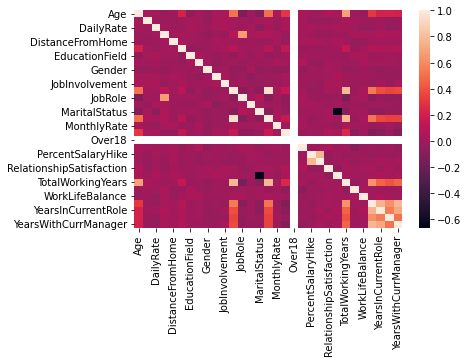

In [48]:
corr = data.corr()

sns.heatmap(corr)

removing features with high correlation

In [49]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = data.columns[columns]
data = data[selected_columns]

splitting the data

In [50]:
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2)

creating and fitting the classifier

In [61]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

RandomForestClassifier()

getting prediction

In [62]:
prediction = clf.predict(x_test)

getting accuracy

In [63]:
acc = accuracy_score(y_test, prediction)

acc

0.891156462585034

In [ ]:
identifying the feature importances

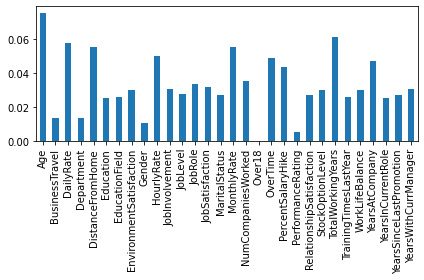

In [70]:
importances = clf.feature_importances_
feature_names = data.columns
clf_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
clf_importances.plot.bar(ax=ax)
fig.tight_layout()